## lenstronomy lens equation solver and flux ratios computation example notebook

In [12]:
# import standard python modules
import copy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
%matplotlib inline


# import the lens model class 
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
# import the lens equation solver class (finding image plane positions of a source position)
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
# import lens model solver with 4 image positions constrains
from lenstronomy.LensModel.Solver.solver2point import Solver2Point #Solver4Point

In [13]:
# chose a lens model (list of parameterized lens models)
lens_model_list = ['EPL'] #, 'SHEAR_GAMMA_PSI'] #, 'NFW', 'NFW']

#initialize classes with the specific lens models
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)
solver2Point = Solver2Point(lensModel=lensModel, solver_type='THETA_E_ELLIPSE')

In [14]:
# x_image, y_image known values
x_image = [2.097939804907363, -2.1223084092251288]
y_image = [0.13923809099998685, -0.09555221154370663]

print('image positions: ', x_image)


image positions:  [2.097939804907363, -2.1223084092251288]


In [22]:
# fit the same lens model parameterization to the 4 image positions (free SPEMD model)
# the initial guess of the model can be rather different but 'gamma' has to be kept fixed
# kwargs_lens_init = copy.deepcopy(kwargs_lens_list)
# center_x, center_y = 0.6455, 0.1236
# 'theta_E': 2.311432821867558, 'e1': -0.18785019961075974, 'e2': -0.12607809088893723
kwargs_lens_init = [{'theta_E': 2.311432821867558, 'gamma': 2., 'e1': -0.18785019961075974, 'e2':  -0.12607809088893723, 'center_x': 0.6455, 'center_y': 0.1236}]

kwargs_fit, precision = solver2Point.constraint_lensmodel(x_pos=x_image, y_pos=y_image, 
                                                          kwargs_list=kwargs_lens_init, xtol=1.49012e-10)

In [23]:
kwargs_fit

[{'theta_E': 1.9959911645800419,
  'gamma': 2.0,
  'e1': -0.22276991273080846,
  'e2': -0.03945818644982793,
  'center_x': 0.6455,
  'center_y': 0.1236}]

## some plots

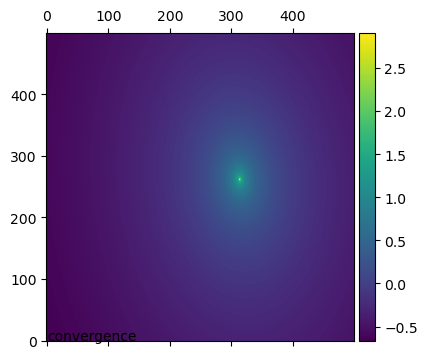

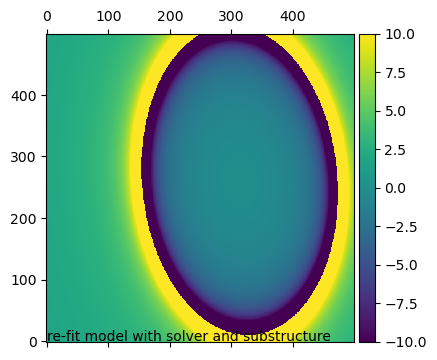

In [24]:
# make a pixel grid suited for plotting
from lenstronomy.Util import util



x_grid, y_grid = util.make_grid(numPix=500, deltapix=0.01)

# plot convergence

kappa_grid = lensModel.kappa(x_grid, y_grid, kwargs_fit)
kappa2d_fit = util.array2image(kappa_grid)


f, axes = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False)


ax = axes
im = ax.matshow(np.log10(kappa2d_fit), origin='lower')
ax.text(1, 1, 'convergence')
ax.autoscale(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

# plot magnification

mag_grid = lensModel.magnification(x_grid, y_grid, kwargs_fit)
mag2d_fit = util.array2image(mag_grid)


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable

f, axes = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False)


ax = axes
im = ax.matshow(mag2d_fit, origin='lower', vmin=-10, vmax=10)
ax.text(1, 1, 're-fit model with solver and substructure')
ax.autoscale(False)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


plt.show()


